<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   continent                           6 non-null      object 
 1   iso_code                            6 non-null      object 
 2   location                            6 non-null      object 
 3   date                                6 non-null      object 
 4   total_cases                         6 non-null      float64
 5   new_cases                           6 non-null      float64
 6   new_cases_smoothed                  6 non-null      float64
 7   total_deaths                        6 non-null      float64
 8   new_deaths                          6 non-null      float64
 9   new_deaths_smoothed                 6 non-null      float64
 10  total_cases_per_million             6 non-null      float64
 11  new_cases_per_million               6 non-null   

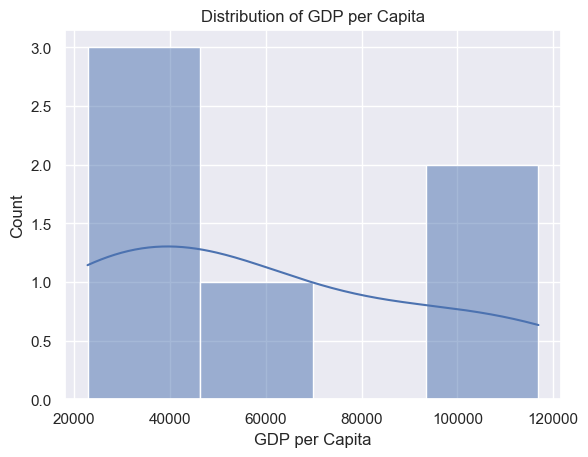

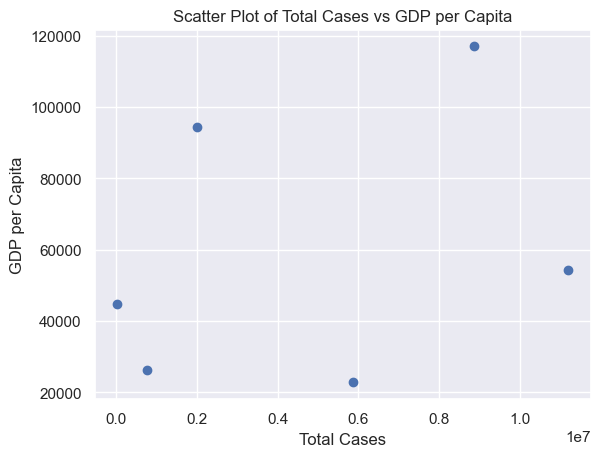

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the dataset
url = 'C://Users//dell//Downloads//covid_data_grouped.csv'
df = pd.read_csv(url)

# 2. High Level Data Understanding
# a. Number of rows and columns
num_rows, num_columns = df.shape

# b. Data types of columns
column_data_types = df.dtypes

# c. Info and describe of data
data_info = df.info()
data_description = df.describe()

# 3. Low Level Data Understanding
# a. Count of unique values in location column
unique_locations_count = df['location'].nunique()

# b. Continent with maximum frequency
continent_max_frequency = df['continent'].value_counts().idxmax()

# c. Maximum and mean value in 'total_cases'
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()

# d. Quartiles for 'total_deaths'
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.50, 0.75])

# e. Continent with maximum 'human_development_index'
continent_max_hdi = df.groupby('continent')['human_development_index'].max().idxmax()

# f. Continent with minimum 'gdp_per_capita'
continent_min_gdp = df.groupby('continent')['gdp_per_capita'].min().idxmin()

# 4. Filter the dataframe
filtered_df = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]

# 5. Data Cleaning
# a. Remove duplicates
df = df.drop_duplicates()

# b. Find missing values
missing_values = df.isnull().sum()

# c. Remove rows with missing continent
df = df.dropna(subset=['continent'])

# d. Fill missing values with 0
df = df.fillna(0)

# 6. Date time format
# a. Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# b. Create a new column 'month'
df['month'] = df['date'].dt.month

# 7. Data Aggregation
# a. Find max value in all columns using groupby on 'continent'
df_groupby = df.groupby('continent').max().reset_index()

# 8. Feature Engineering
# a. Create a new feature 'total_deaths_to_total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

# 9. Data Visualization
# a. Univariate analysis on 'gdp_per_capita'
sns.set()
sns.histplot(df_groupby['gdp_per_capita'], kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.show()

# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
plt.scatter(df_groupby['total_cases'], df_groupby['gdp_per_capita'])
plt.xlabel('Total Cases')
plt.ylabel('GDP per Capita')
plt.title('Scatter Plot of Total Cases vs GDP per Capita')
plt.show()

# c. Plot Pairplot on df_groupby dataset (without Seaborn)
import pandas.plotting as pd_plotting
pd_plotting.scatter_matrix(df_groupby, figsize=(12, 12))
plt.show()

# d. Plot a bar plot of 'continent' column with 'total_cases' (without Seaborn)
plt.bar(df_groupby['continent'], df_groupby['total_cases'])
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Bar Plot of Total Cases by Continent')
plt.xticks(rotation=45)
plt.show()

# 10. Save the df_groupby dataframe to a CSV file
df_groupby.to_csv('covid_data_grouped', index=False)